| Variable Name                  | Role   | Type        | Demographic                                        | Description                                                                                   | Units | Missing Values |
|--------------------------------|--------|-------------|----------------------------------------------------|-----------------------------------------------------------------------------------------------|-------|----------------|
| Gender                         | Feature| Categorical | Gender                                             |                                                                                               |       | no             |
| Age                            | Feature| Continuous  | Age                                                |                                                                                               |       | no             |
| Height                         | Feature| Continuous  |                                                    |                                                                                               |       | no             |
| Weight                         | Feature| Continuous  |                                                    |                                                                                               |       | no             |
| family_history_with_overweight| Feature| Binary      |                                                    | Has a family member suffered or suffers from overweight?                                      |       | no             |
| FAVC                           | Feature| Binary      |                                                    | Do you eat high caloric food frequently?                                                      |       | no             |
| FCVC                           | Feature| Integer     |                                                    | Do you usually eat vegetables in your meals?                                                  |       | no             |
| NCP                            | Feature| Continuous  |                                                    | How many main meals do you have daily?                                                        |       | no             |
| CAEC                           | Feature| Categorical |                                                    | Do you eat any food between meals?                                                            |       | no             |
| SMOKE                          | Feature| Binary      |                                                    | Do you smoke?                                                                                 |       | no             |
| CH2O                           | Feature| Continuous  |                                                    | How much water do you drink daily?                                                           |       | no             |
| SCC                            | Feature| Binary      |                                                    | Do you monitor the calories you eat daily?                                                    |       | no             |
| FAF                            | Feature| Continuous  |                                                    | How often do you have physical activity?                                                     |       | no             |
| TUE                            | Feature| Integer     |                                                    | How much time do you use technological devices such as cell phone, videogames, television, computer and others? |       | no             |
| CALC                           | Feature| Categorical |                                                    | How often do you drink alcohol?                                                              |       | no             |
| MTRANS                         | Feature| Categorical |                                                    | Which transportation do you usually use?                                                      |       | no             |
| NObeyesdad                     | Target | Categorical |                                                    | Obesity level                                                                                |       | no             |


In [45]:
import joblib

In [46]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [49]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [50]:
unique_values_counts = df['NObeyesdad'].value_counts()

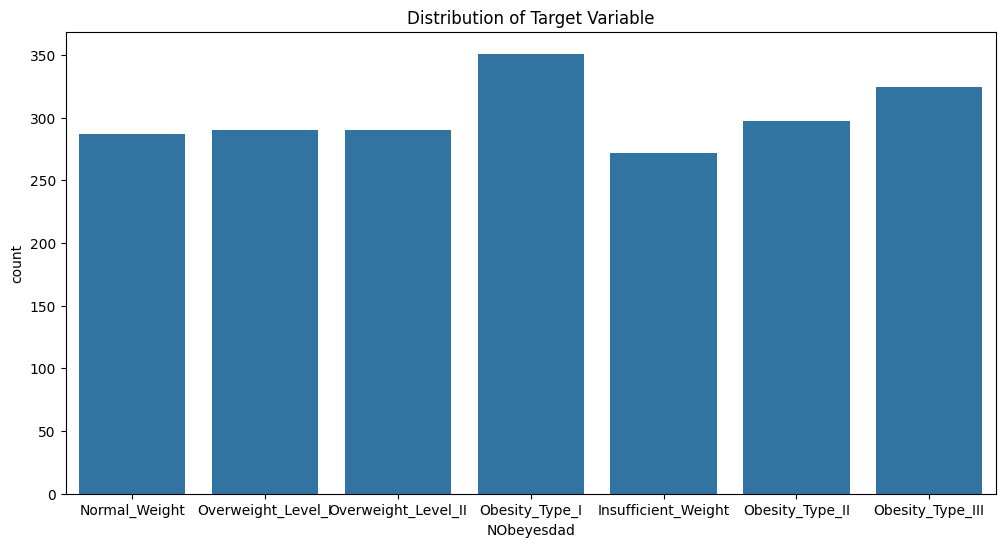

In [51]:

plt.figure(figsize=(12, 6))
sns.countplot(x="NObeyesdad", data=df)
plt.title("Distribution of Target Variable")
plt.show()

In [52]:
cat_features = df.select_dtypes(include = ['object'])
cat_features.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [53]:
cat_features

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [54]:
for i in cat_features:
    print(f"{i} : {df[i].unique()}")

Gender : ['Female' 'Male']
family_history_with_overweight : ['yes' 'no']
FAVC : ['no' 'yes']
CAEC : ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE : ['no' 'yes']
SCC : ['no' 'yes']
CALC : ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad : ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [55]:
le = LabelEncoder()
for i in cat_features:
    df[i] = le.fit_transform(df[i])

In [56]:
for i in cat_features:
    print(f"{i} : {df[i].unique()}")

Gender : [0 1]
family_history_with_overweight : [1 0]
FAVC : [0 1]
CAEC : [2 1 0 3]
SMOKE : [0 1]
SCC : [0 1]
CALC : [3 2 1 0]
MTRANS : [3 4 0 2 1]
NObeyesdad : [1 5 6 2 0 3 4]


In [57]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [58]:
X = df.drop('NObeyesdad', axis=1) 
y = df['NObeyesdad']

In [59]:
scaler = MinMaxScaler()

In [60]:
# scaler = StandardScaler()

RFclassifier = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

RFclassifier.fit(X_train_scaled, y_train)

y_pred = RFclassifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9196217494089834


In [61]:
# Save the trained model to a file
joblib.dump(RFclassifier, 'RandomForestClassifier.pkl')

['RandomForestClassifier.pkl']

In [62]:
y_pred = RFclassifier.predict([[1.        , 0.17021277, 0.43754268, 0.12622076, 1.        ,
       1.        , 0.5       , 0.66666667, 0.66666667, 0.        ,
       0.5       , 0.        , 0.        , 1.        , 0.66666667,
       0.        ]])

In [63]:
y_pred

array([1])

In [23]:
X_train_scaled

array([[0.        , 0.404194  , 0.42317226, ..., 0.086898  , 0.66666667,
        0.        ],
       [0.        , 0.1346324 , 0.63294164, ..., 0.3841875 , 0.66666667,
        0.75      ],
       [0.        , 0.25531791, 0.33763647, ..., 0.209723  , 0.66666667,
        0.75      ],
       ...,
       [1.        , 0.17021277, 0.41851909, ..., 0.        , 0.66666667,
        0.75      ],
       [0.        , 0.09508694, 0.5553463 , ..., 0.3312445 , 0.66666667,
        0.75      ],
       [0.        , 0.53191489, 0.3804719 , ..., 0.        , 0.66666667,
        0.75      ]])

In [24]:
y_pred

array([1, 0, 5, 2, 1, 1, 5, 2, 3, 4, 3, 0, 0, 3, 4, 3, 5, 1, 3, 3, 0, 1,
       6, 0, 4, 3, 2, 0, 2, 6, 1, 5, 0, 2, 3, 4, 2, 2, 4, 1, 3, 4, 3, 2,
       2, 3, 6, 6, 0, 2, 0, 0, 3, 3, 0, 1, 3, 2, 4, 6, 4, 0, 1, 6, 1, 4,
       5, 5, 2, 4, 2, 0, 4, 6, 2, 4, 2, 2, 5, 3, 2, 4, 2, 6, 1, 6, 3, 1,
       5, 0, 6, 5, 3, 3, 2, 0, 4, 6, 3, 1, 3, 3, 2, 3, 2, 5, 5, 4, 6, 5,
       2, 6, 2, 4, 4, 3, 1, 3, 5, 2, 2, 4, 2, 2, 0, 4, 5, 5, 4, 2, 1, 3,
       3, 1, 2, 6, 2, 6, 1, 4, 2, 0, 4, 2, 4, 4, 1, 4, 3, 6, 5, 3, 6, 5,
       4, 1, 5, 1, 6, 4, 6, 3, 6, 1, 3, 6, 1, 5, 4, 4, 2, 3, 1, 3, 0, 3,
       2, 0, 3, 0, 3, 4, 2, 5, 0, 4, 5, 1, 0, 1, 1, 4, 4, 1, 2, 1, 4, 6,
       2, 1, 5, 1, 2, 2, 1, 6, 0, 0, 1, 2, 3, 2, 2, 2, 0, 4, 1, 2, 2, 2,
       1, 3, 2, 5, 2, 2, 2, 3, 1, 6, 5, 6, 4, 6, 3, 4, 4, 4, 2, 1, 0, 4,
       3, 5, 4, 3, 5, 0, 5, 3, 0, 0, 2, 6, 6, 6, 0, 4, 6, 4, 4, 1, 1, 3,
       2, 1, 6, 0, 3, 2, 0, 0, 6, 0, 6, 6, 2, 2, 4, 4, 1, 6, 2, 2, 0, 1,
       6, 6, 5, 5, 2, 2, 5, 3, 1, 2, 5, 4, 2, 5, 5,

In [23]:
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1,24.39
1,0,21.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1,24.24
2,1,23.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1,23.77
3,1,27.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5,26.85
4,1,22.0,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6,28.34


# ANN

In [30]:
cv_scores_train = []
cv_scores_test = []

scaler = StandardScaler()
model_ANN = Sequential()

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model_ANN.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model_ANN.add(Dense(64, activation='relu'))
    model_ANN.add(Dense(7, activation='softmax'))

    model_ANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model_ANN.fit(X_train_scaled, y_train, epochs=40, batch_size=45, verbose=0)

    train_score = model_ANN.evaluate(X_train_scaled, y_train, verbose=0)[1]  # Accuracy is at index 1
    test_score = model_ANN.evaluate(X_test_scaled, y_test, verbose=0)[1]  # Accuracy is at index 1

    cv_scores_train.append(train_score)
    cv_scores_test.append(test_score)

mean_cv_score = np.mean(cv_scores_train)
print(f"Mean Cross-Validation Training Accuracy: {mean_cv_score}")
mean_cv_score = np.mean(cv_scores_test)
print(f"Mean Cross-Validation Testing Accuracy: {mean_cv_score}")

Mean Cross-Validation Training Accuracy: 0.8420616209506988
Mean Cross-Validation Testing Accurac: 0.8307328641414642


# LogisticRegression

In [35]:
cv_scores_train = []
cv_scores_test = []
model = LogisticRegression(max_iter=1000, solver="saga")
scaler = StandardScaler()

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model.fit(X_train_scaled, y_train)

    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)

    cv_scores_train.append(train_score)
    cv_scores_test.append(test_score)

mean_cv_score = np.mean(cv_scores_train)
print(f"Mean Cross-Validation Training Accuracy: {mean_cv_score}")

mean_cv_score = np.mean(cv_scores_test)
print(f"Mean Cross-Validation Testing Accuracy: {mean_cv_score}")

Mean Cross-Validation Training Accuracy: 0.9066350710900475
Mean Cross-Validation Testing Accuracy: 0.891016548463357


In [25]:
print(cv_scores_train)
print(cv_scores_test)

[0.9063981042654028, 0.9058056872037915, 0.9135071090047393, 0.9040284360189573, 0.909952606635071, 0.9040284360189573, 0.8998815165876777, 0.9069905213270142, 0.9087677725118484, 0.9063981042654028]
[0.8817966903073287, 0.8912529550827423, 0.851063829787234, 0.9054373522458629, 0.8865248226950354, 0.900709219858156, 0.8747044917257684, 0.8936170212765957, 0.8676122931442081, 0.8817966903073287]
